# Vectorization

In [1]:
import warnings
warnings.filterwarnings("ignore")                     #Ignoring unnecessory warnings
from tqdm import tqdm
import numpy as np                                  
import pandas as pd                                 
from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
full_train = pd.read_csv('./preprocess/processed_train/full_train_data.csv',sep = '\t')
full_train.head()

,Unnamed: 0,product_category,review_body,sentiment_actual,processed
0,0,Camera,Works well with my Nikon D610. The range is a ...,pos,work well nikon d610 rang littl short though p...
1,1,Camera,"Wow, construction of this bag is second to non...",pos,wow construct bag second none plenti storag la...
2,2,Camera,i should have put system in a long time ago. ...,pos,put system long time ago pleas result instal p...
3,3,Camera,"So, I'm new to the arca swiss world. And my bo...",pos,so i'm new arca swiss world boss introduc real...
4,4,Camera,"Great camera, now if I can learn all its finer...",pos,great camera learn finer point turn one grands...


In [3]:
full_test = pd.read_csv('./preprocess/processed_test/full_test_data.csv',sep = '\t')
full_test.head()

,Unnamed: 0,product_category,review_body,sentiment_actual,processed
0,0,Camera,I've had this Fuji 2800 camera for about 1 mon...,pos,i'v fuji 2800 camera 1 month simpli love it to...
1,1,Camera,great camera .......<br />works perfectly the ...,pos,great camera work perfect way want look awesom
2,2,Camera,I did quite a bit of shopping around before bu...,pos,quit bit shop around buy camera could not happ...
3,3,Camera,works,pos,work
4,4,Camera,This is a very simple clamp that works exactly...,pos,simpl clamp work exact should depend posit cla...


## Full train/test label and feature

### Labels for train and test

In [4]:
# Get labels
full_train['sentiment_actual'] = full_train.sentiment_actual.map({'neg': 0, 'pos': 1})
full_train_label = full_train['sentiment_actual']

full_test['sentiment_actual'] = full_test.sentiment_actual.map({'neg': 0, 'pos': 1})
full_test_label = full_test['sentiment_actual']

In [5]:
camera_train = full_train.loc[full_train['product_category'] == "Camera"]
camera_test = full_test.loc[full_test['product_category'] == "Camera"]
camera_train.head()

,Unnamed: 0,product_category,review_body,sentiment_actual,processed
0,0,Camera,Works well with my Nikon D610. The range is a ...,1,work well nikon d610 rang littl short though p...
1,1,Camera,"Wow, construction of this bag is second to non...",1,wow construct bag second none plenti storag la...
2,2,Camera,i should have put system in a long time ago. ...,1,put system long time ago pleas result instal p...
3,3,Camera,"So, I'm new to the arca swiss world. And my bo...",1,so i'm new arca swiss world boss introduc real...
4,4,Camera,"Great camera, now if I can learn all its finer...",1,great camera learn finer point turn one grands...


In [6]:
# Labels
camera_train_label = camera_train['sentiment_actual']
camera_test_label = camera_test['sentiment_actual']

In [7]:
grocery_train = full_train.loc[full_train['product_category'] == "Grocery"]
grocery_test = full_test.loc[full_test['product_category'] == "Grocery"]
grocery_train.head()

,Unnamed: 0,product_category,review_body,sentiment_actual,processed
100000,100000,Grocery,"If cooked al dente, doesn't come out gummy. H...",1,cook al dent not come gummi fresh tast stand l...
100001,100001,Grocery,Fun to have the pull tabs. A friend who went ...,1,fun pull tab friend went australia recommend t...
100002,100002,Grocery,I have bought this product before and love it....,1,bought product love it use tea everi day due s...
100003,100003,Grocery,Been buying this for a couple years. Really li...,1,buy coupl year realli like pure flavor without...
100004,100004,Grocery,I purchaesd this item for myself. I love the t...,1,purchaesd item myself love tast creami textur ...


In [8]:
# Labels
grocery_train_label = grocery_train['sentiment_actual']
grocery_test_label = grocery_test['sentiment_actual']

In [9]:
watches_train = full_train.loc[full_train['product_category'] == "Watches"]
watches_test = full_test.loc[full_test['product_category'] == "Watches"]
watches_train.head()

,Unnamed: 0,product_category,review_body,sentiment_actual,processed
200000,200000,Watches,This watch is great i am leaving for bct going...,1,watch great leav bct go armi need watch bought...
200001,200001,Watches,I got this for my son for Christmas. It was i...,1,got son christma great shape look great work w...
200002,200002,Watches,I bought it for my wife and the watch really l...,1,bought wife watch realli look much better pict...
200003,200003,Watches,was bought for a birthday present - was exactl...,1,bought birthday present exact want deliveri p...
200004,200004,Watches,Great watch!,1,great watch


In [10]:
# Labels
watches_train_label = watches_train['sentiment_actual']
watches_test_label = watches_test['sentiment_actual']

In [11]:
videogames_train = full_train.loc[full_train['product_category'] == "Video Games"]
videogames_test = full_test.loc[full_test['product_category'] == "Video Games"]
videogames_train.head()

,Unnamed: 0,product_category,review_body,sentiment_actual,processed
300000,300000,Video Games,Item was delivered as specified and in same qu...,1,item deliv specifi qualiti list onlin
300001,300001,Video Games,"My son loved this game, it was just what he wa...",1,son love game want christma happi excit reciev...
300002,300002,Video Games,"Case had adhesive residue on it, but was easil...",1,case adhes residu it easili remov happi came c...
300003,300003,Video Games,I have got my file and found that I've got an ...,1,got file found i'v got esitm 14000 kill game k...
300004,300004,Video Games,"Comfortable, Attractive, Accurate, totally cus...",1,comfort attract accur total customiz dpi chang...


In [12]:
# Labels
videogames_train_label = videogames_train['sentiment_actual']
videogames_test_label = videogames_test['sentiment_actual']

### Features for train and test
Vectorize using bag of words

In [13]:
# Get processed texts
train_texts = full_train['processed'].astype('U')
test_texts = full_test['processed'].astype('U')

camera_train_texts = camera_train['processed'].astype('U')
camera_test_texts = camera_test['processed'].astype('U')

grocery_train_texts = grocery_train['processed'].astype('U')
grocery_test_texts = grocery_test['processed'].astype('U')

watches_train_texts = watches_train['processed'].astype('U')
watches_test_texts = watches_test['processed'].astype('U')

videogames_train_texts = videogames_train['processed'].astype('U')
videogames_test_texts = videogames_test['processed'].astype('U')

# count vectorize
count_vect = CountVectorizer()

train_counts = count_vect.fit_transform(train_texts)
test_counts = count_vect.transform(test_texts)

camera_train_counts = count_vect.transform(camera_train_texts)
camera_test_counts = count_vect.transform(camera_test_texts)

grocery_train_counts = count_vect.transform(grocery_train_texts)
grocery_test_counts = count_vect.transform(grocery_test_texts)

watches_train_counts = count_vect.transform(watches_train_texts)
watches_test_counts = count_vect.transform(watches_test_texts)

videogames_train_counts = count_vect.transform(videogames_train_texts)
videogames_test_counts = count_vect.transform(videogames_test_texts)

# Transform with tfidf
transformer = TfidfTransformer()

transformer = transformer.fit(train_counts)
transformer = transformer.fit(test_counts)

transformer = transformer.fit(camera_train_counts)
transformer = transformer.fit(camera_test_counts)

transformer = transformer.fit(grocery_train_counts)
transformer = transformer.fit(grocery_test_counts)

transformer = transformer.fit(watches_train_counts)
transformer = transformer.fit(watches_test_counts)

transformer = transformer.fit(videogames_train_counts)
transformer = transformer.fit(videogames_test_counts)

# Get features
train_features = transformer.transform(train_counts)
test_features = transformer.transform(test_counts)

camera_train_features = transformer.transform(camera_train_counts)
camera_test_features = transformer.transform(camera_test_counts)

grocery_train_features = transformer.transform(grocery_train_counts)
grocery_test_features = transformer.transform(grocery_test_counts)

watches_train_features = transformer.transform(watches_train_counts)
watches_test_features = transformer.transform(watches_test_counts)

videogames_train_features = transformer.transform(videogames_train_counts)
videogames_test_features = transformer.transform(videogames_test_counts)

In [14]:
print(train_features.shape[0])
print(full_train_label.shape[0])
print(test_features.shape[0])
print(full_test_label.shape[0])

400000
400000
79838
79838


In [15]:
print(camera_train_features.shape[0])
print(grocery_train_features.shape[0])
print(watches_train_features.shape[0])
print(videogames_train_features.shape[0])

print(camera_test_features.shape[0])
print(grocery_test_features.shape[0])
print(watches_test_features.shape[0])
print(videogames_test_features.shape[0])

100000
100000
100000
100000
19914
20136
20266
19522


## Binary Classification

In [16]:
def eval(name, y_gold, y_pred, verbose=1, setting='macro'):
    '''Yield metrics accuracy, precision, recall and f1-score'''
    eval_measures = precision_recall_fscore_support(y_gold, y_pred, average=setting)
    
    if verbose==1:
        print("{} acc: {:4f} prec: {:4f} rec: {:4f} f1: {:4f}".format(
        name, accuracy_score(y_gold, y_pred), eval_measures[0], eval_measures[1], eval_measures[2]))       
    return eval_measures

In [17]:
# For plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

### Naive bayes

In [18]:
naivebayes = MultinomialNB()
naivebayes.fit(train_features, full_train_label)
predict_nb = naivebayes.predict(test_features)

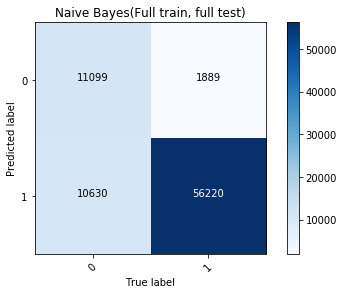

In [19]:
cm_nb = confusion_matrix(full_test_label,predict_nb)
plot_confusion_matrix(cm_nb, classes=naivebayes.classes_.tolist(),
                      title='Naive Bayes(Full train, full test)')
# plt.show()
plt.savefig('./plots/full_full_nb.png')

In [20]:
full_full_eval_nb = eval("Naive Bayes", full_test_label, predict_nb)

Naive Bayes acc: 0.843195 prec: 0.739142 rec: 0.847773 f1: 0.769607


#### Test on camera

In [21]:
camera_predict_nb = naivebayes.predict(camera_test_features)

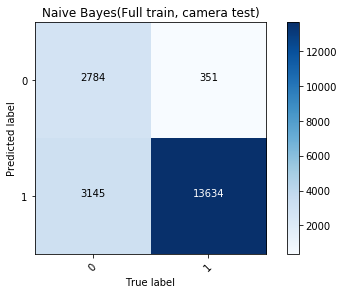

In [22]:
cm_nb = confusion_matrix(camera_test_label,camera_predict_nb)
plot_confusion_matrix(cm_nb, classes=naivebayes.classes_.tolist(),
                      title='Naive Bayes(Full train, camera test)')
plt.savefig('./plots/full_camera_nb.png')

In [23]:
full_camera_eval_nb = eval("Naive Bayes", camera_test_label, camera_predict_nb)

Naive Bayes acc: 0.824445 prec: 0.722229 rec: 0.850301 f1: 0.750330


#### Test on grocery

In [24]:
grocery_predict_nb = naivebayes.predict(grocery_test_features)

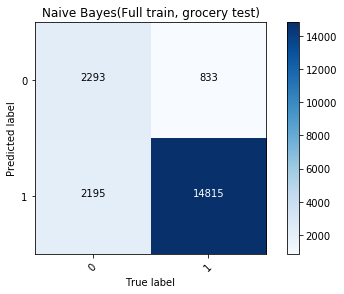

In [25]:
cm_nb = confusion_matrix(grocery_test_label,grocery_predict_nb)
plot_confusion_matrix(cm_nb, classes=naivebayes.classes_.tolist(),
                      title='Naive Bayes(Full train, grocery test)')
plt.savefig('./plots/full_grocery_nb.png')

In [26]:
full_grocery_eval_nb = eval("Naive Bayes", grocery_test_label, grocery_predict_nb)

Naive Bayes acc: 0.849623 prec: 0.728842 rec: 0.802242 f1: 0.754797


#### Test on watches

In [27]:
watches_predict_nb = naivebayes.predict(watches_test_features)

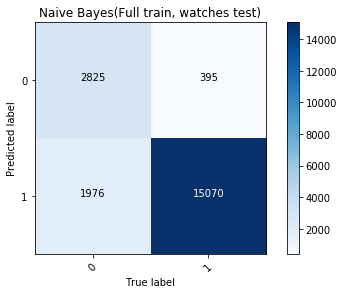

In [28]:
cm_nb = confusion_matrix(watches_test_label,watches_predict_nb)
plot_confusion_matrix(cm_nb, classes=naivebayes.classes_.tolist(),
                      title='Naive Bayes(Full train, watches test)')
plt.savefig('./plots/full_watches_nb.png')

In [29]:
full_watches_eval_nb = eval("Naive Bayes", watches_test_label, watches_predict_nb)

Naive Bayes acc: 0.883006 prec: 0.781439 rec: 0.880704 f1: 0.815736


#### Test on videogames

In [30]:
videogames_predict_nb = naivebayes.predict(videogames_test_features)

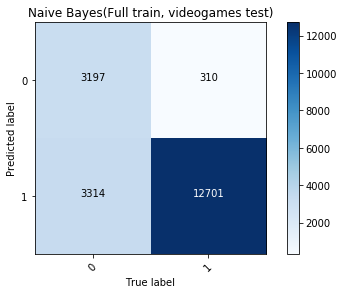

In [31]:
cm_nb = confusion_matrix(videogames_test_label,videogames_predict_nb)
plot_confusion_matrix(cm_nb, classes=naivebayes.classes_.tolist(),
                      title='Naive Bayes(Full train, videogames test)')
plt.savefig('./plots/full_videogames_nb.png')

In [32]:
full_videogames_eval_nb = eval("Naive Bayes", videogames_test_label, videogames_predict_nb)

Naive Bayes acc: 0.814363 prec: 0.733595 rec: 0.852337 f1: 0.756699


### Logistic regression

In [33]:
logregression = LogisticRegression()
logregression.fit(train_features, full_train_label)
predict_lr = logregression.predict(test_features)

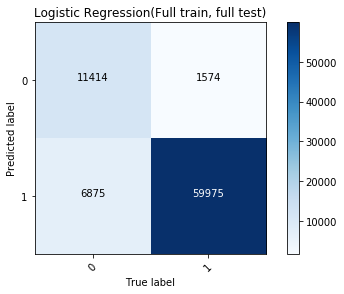

In [34]:
cm_lr = confusion_matrix(full_test_label,predict_lr)
plot_confusion_matrix(cm_lr, classes=logregression.classes_.tolist(),
                      title='Logistic Regression(Full train, full test)')
plt.savefig('./plots/full_full_lr.png')

In [35]:
full_full_eval_lr = eval("Logistic Regression", full_test_label, predict_lr)

Logistic Regression acc: 0.894173 prec: 0.799259 rec: 0.887985 f1: 0.832031


#### Test on camera

In [36]:
camera_predict_lr = logregression.predict(camera_test_features)

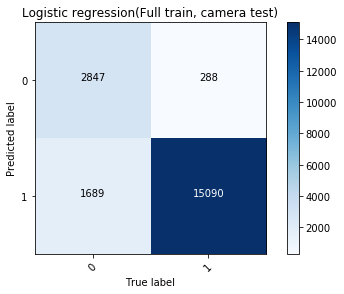

In [37]:
cm_lr = confusion_matrix(camera_test_label,camera_predict_lr)
plot_confusion_matrix(cm_lr, classes=logregression.classes_.tolist(),
                      title='Logistic regression(Full train, camera test)')
plt.savefig('./plots/full_camera_lr.png')

In [38]:
full_camera_eval_lr = eval("Logistic Regerssion", camera_test_label, camera_predict_lr)

Logistic Regerssion acc: 0.900723 prec: 0.804459 rec: 0.903736 f1: 0.840398


#### Test on grocery

In [39]:
grocery_predict_lr = logregression.predict(grocery_test_features)

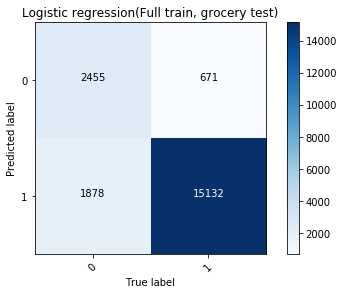

In [40]:
cm_lr = confusion_matrix(grocery_test_label,grocery_predict_lr)
plot_confusion_matrix(cm_lr, classes=logregression.classes_.tolist(),
                      title='Logistic regression(Full train, grocery test)')
plt.savefig('./plots/full_grocery_lr.png')

In [41]:
full_grocery_eval_lr = eval("Logistic Regerssion", grocery_test_label, grocery_predict_lr)

Logistic Regerssion acc: 0.873411 prec: 0.762061 rec: 0.837472 f1: 0.790291


#### Test on watches

In [42]:
watches_predict_lr = logregression.predict(watches_test_features)

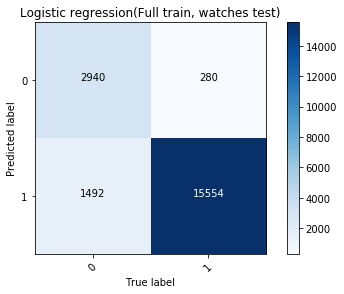

In [43]:
cm_lr = confusion_matrix(watches_test_label,watches_predict_lr)
plot_confusion_matrix(cm_lr, classes=logregression.classes_.tolist(),
                      title='Logistic regression(Full train, watches test)')
plt.savefig('./plots/full_watches_lr.png')

In [44]:
full_watches_eval_lr = eval("Logistic Regerssion", watches_test_label, watches_predict_lr)

Logistic Regerssion acc: 0.912563 prec: 0.822837 rec: 0.912758 f1: 0.857267


#### Test on video games

In [45]:
videogames_predict_lr = logregression.predict(videogames_test_features)

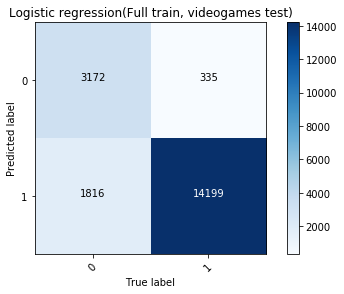

In [46]:
cm_lr = confusion_matrix(videogames_test_label,videogames_predict_lr)
plot_confusion_matrix(cm_lr, classes=logregression.classes_.tolist(),
                      title='Logistic regression(Full train, videogames test)')
plt.savefig('./plots/full_videogames_lr.png')

In [47]:
full_videogames_eval_lr = eval("Logistic Regerssion", videogames_test_label, videogames_predict_lr)

Logistic Regerssion acc: 0.889817 prec: 0.806438 rec: 0.895542 f1: 0.838190


## Individual class

### Camera

#### Naive Bayes

In [48]:
# Naive Bayes
naivebayes = MultinomialNB()
naivebayes.fit(camera_train_features, camera_train_label)
camera_predict_nb = naivebayes.predict(camera_test_features)

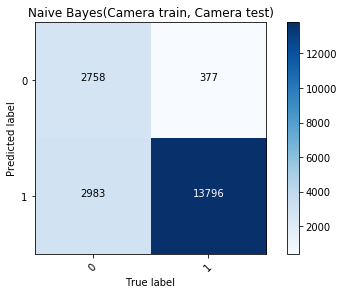

In [49]:
cm_nb = confusion_matrix(camera_test_label,camera_predict_nb)
plot_confusion_matrix(cm_nb, classes=naivebayes.classes_.tolist(),
                      title='Naive Bayes(Camera train, Camera test)')
plt.savefig('./plots/camera_camera_nb.png')

In [50]:
camera_camera_eval_nb = eval("Naive Bayes", camera_test_label, camera_predict_nb)

Naive Bayes acc: 0.831274 prec: 0.726902 rec: 0.850982 f1: 0.756448


#### Logistic Regression

In [51]:
# Logistic regression
logregression = LogisticRegression()
logregression.fit(camera_train_features, camera_train_label)
camera_predict_lr = logregression.predict(camera_test_features)

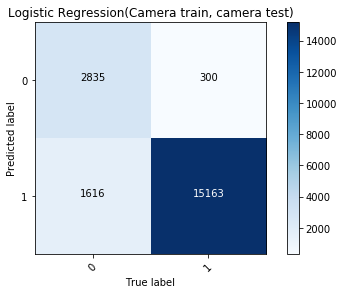

In [52]:
cm_lr = confusion_matrix(camera_test_label,camera_predict_lr)
plot_confusion_matrix(cm_lr, classes=logregression.classes_.tolist(),
                      title='Logistic Regression(Camera train, camera test)')
plt.savefig('./plots/camera_camera_lr.png')

In [53]:
camera_camera_eval_lr = eval("Logistic Regerssion", camera_test_label, camera_predict_lr)

Logistic Regerssion acc: 0.903786 prec: 0.808767 rec: 0.903998 f1: 0.844002


### Grocery

#### Naive Bayes

In [54]:
# Naive Bayes
naivebayes = MultinomialNB()
naivebayes.fit(grocery_train_features, grocery_train_label)
grocery_predict_nb = naivebayes.predict(grocery_test_features)

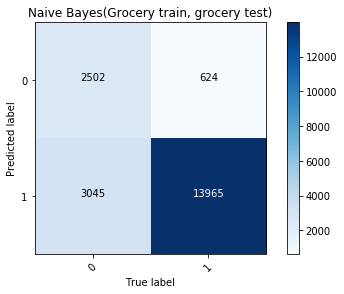

In [55]:
cm_nb = confusion_matrix(grocery_test_label,grocery_predict_nb)
plot_confusion_matrix(cm_nb, classes=naivebayes.classes_.tolist(),
                      title='Naive Bayes(Grocery train, grocery test)')
plt.savefig('./plots/grocery_grocery_nb.png')

In [56]:
grocery_grocery_eval_nb = eval("Naive Bayes", grocery_test_label, grocery_predict_nb)

Naive Bayes acc: 0.817789 prec: 0.704141 rec: 0.810686 f1: 0.730426


#### Logistic Regression

In [57]:
# Logistic regression
logregression = LogisticRegression()
logregression.fit(grocery_train_features, grocery_train_label)
grocery_predict_lr = logregression.predict(grocery_test_features)

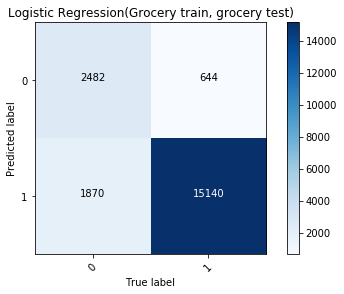

In [58]:
cm_lr = confusion_matrix(grocery_test_label,grocery_predict_lr)
plot_confusion_matrix(cm_lr, classes=logregression.classes_.tolist(),
                      title='Logistic Regression(Grocery train, grocery test)')
plt.savefig('./plots/grocery_grocery_lr.png')

In [59]:
grocery_grocery_eval_lr = eval("Logistic Regerssion", grocery_test_label, grocery_predict_lr)

Logistic Regerssion acc: 0.875149 prec: 0.764756 rec: 0.842025 f1: 0.793577


### Watches

#### Naive Bayes

In [60]:
# Naive Bayes
naivebayes = MultinomialNB()
naivebayes.fit(watches_train_features, watches_train_label)
watches_predict_nb = naivebayes.predict(watches_test_features)

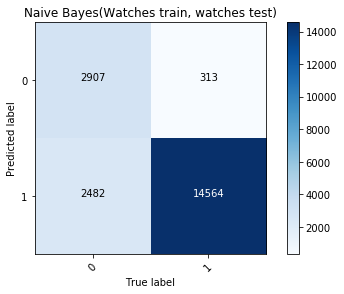

In [61]:
cm_nb = confusion_matrix(watches_test_label,watches_predict_nb)
plot_confusion_matrix(cm_nb, classes=naivebayes.classes_.tolist(),
                      title='Naive Bayes(Watches train, watches test)')
plt.savefig('./plots/watches_watches_nb.png')

In [62]:
watches_watches_eval_nb = eval("Naive Bayes", watches_test_label, watches_predict_nb)

Naive Bayes acc: 0.862084 prec: 0.759196 rec: 0.878595 f1: 0.793893


#### Logistic Regression

In [63]:
# Logistic regression
logregression = LogisticRegression()
logregression.fit(watches_train_features, watches_train_label)
watches_predict_lr = logregression.predict(watches_test_features)

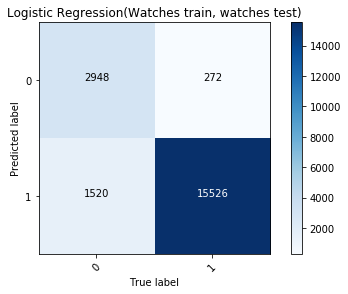

In [64]:
cm_lr = confusion_matrix(watches_test_label,watches_predict_lr)
plot_confusion_matrix(cm_lr, classes=logregression.classes_.tolist(),
                      title='Logistic Regression(Watches train, watches test)')
plt.savefig('./plots/watches_watches_lr.png')

In [65]:
watches_watches_eval_lr = eval("Logistic Regerssion", watches_test_label, watches_predict_lr)

Logistic Regerssion acc: 0.911576 prec: 0.821293 rec: 0.913179 f1: 0.856174


### Video games

#### Naive Bayes

In [66]:
# Naive Bayes
naivebayes = MultinomialNB()
naivebayes.fit(videogames_train_features, videogames_train_label)
videogames_predict_nb = naivebayes.predict(videogames_test_features)

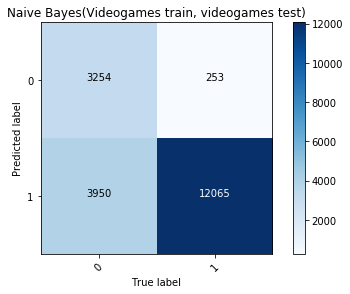

In [67]:
cm_nb = confusion_matrix(videogames_test_label,videogames_predict_nb)
plot_confusion_matrix(cm_nb, classes=naivebayes.classes_.tolist(),
                      title='Naive Bayes(Videogames train, videogames test)')
plt.savefig('./plots/videogames_videogames_nb.png')

In [68]:
videogames_videogames_eval_nb = eval("Naive Bayes", videogames_test_label, videogames_predict_nb)

Naive Bayes acc: 0.784704 prec: 0.715577 rec: 0.840607 f1: 0.729628


#### Logistic Regression

In [69]:
# Logistic regression
logregression = LogisticRegression()
logregression.fit(videogames_train_features, videogames_train_label)
videogames_predict_lr = logregression.predict(videogames_test_features)

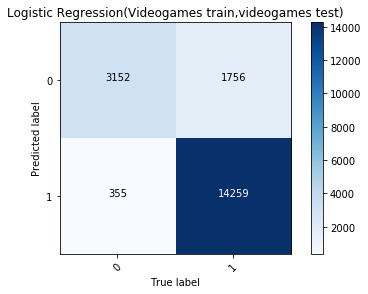

In [70]:
cm_lr = confusion_matrix(videogames_predict_lr,videogames_test_label)
plot_confusion_matrix(cm_lr, classes=logregression.classes_.tolist(),
                      title='Logistic Regression(Videogames train,videogames test)')
plt.savefig('./plots/videogames_videogames_lr.png')

In [71]:
videogames_videogames_eval_lr = eval("Logistic Regerssion", videogames_test_label, videogames_predict_lr)

Logistic Regerssion acc: 0.891866 prec: 0.808963 rec: 0.894563 f1: 0.840108
